<font size =6>Project Introudction</font>
  
In this project, we used code violations dataset from Syracuse open data portal and asked several questions to answer.  
  
This dataset records every housing code violation in Syracuse, as well as where it occurred, when it occurred, what the violation was, as well as the name and location of who is responsible for the violation.  
  
Questions we answered:  
1. Is there any correlation between neighborhood/location and type of violation?  
2. Are the building owners generally local? Are any of them repeat offenders? 
3. How did COVID impact the number of housing violations (if at all)?  
4. Have the kinds of violations given out changed over time?  
5. Will we see a relationship between demographic and the types/amount of violations?  
  
Major steps in the process:  
1. Data cleaning and transformation  
We read the dataset and did data cleaning and transformation on several columns. This step included converting column types (string to datetime), checking date range and filtering bad records (date recorded as back to year 1900), merging our data with API-sourced census data, and doing some string cleaning in the violation column (a shorter version of violation name is created excluding redundant information).  
2. Descriptive analysis and plotting  
We worked on some descriptive analysis regarding several attributes in the data table using seaborn and also by grouping the data.  
3. Answering addressed questions  
We answered the questions listed  
4. Conclusion and Discussion  
Listing our results and discussion for this project


<font size =4>Code begins below:</font>  
Group member who is in charge of producing code and analyzing is mentioned as in "()" after minor titles.

In [2]:
# import needed modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read in dataset and merge dataset
df1 = pd.read_csv('Datasets/Code_Violations.csv')
df2 = pd.read_csv('Datasets/Code_Violations-1.csv')
code_violations = pd.concat([df1, df2], ignore_index=True)
print(code_violations.shape)

(98420, 24)


<font size =6>Step 1. Data cleaning and transformation</font>

<font size =4># 1. Glimpse the dataset</font>  (Hang)

In [4]:
code_violations.dtypes
# Many of these columns are chracters

X                      float64
Y                      float64
violation_number        object
complaint_address       object
complaint_zip            int64
SBL                     object
violation               object
violation_date          object
comply_by_date          object
status_type_name        object
complaint_number        object
complaint_type_name     object
open_date               object
owner_name              object
inspector_id             int64
Neighborhood            object
Vacant                  object
owner_address           object
owner_city              object
owner_state             object
owner_zip_code          object
Latitude               float64
Longitude              float64
ObjectId                 int64
dtype: object

In [5]:
code_violations.head()

,X,Y,violation_number,complaint_address,complaint_zip,SBL,violation,violation_date,comply_by_date,status_type_name,...,inspector_id,Neighborhood,Vacant,owner_address,owner_city,owner_state,owner_zip_code,Latitude,Longitude,ObjectId
0,-8.480408e+06,5.317057e+06,2021-14216,1631-33 Onondaga St W,13204,091.-14-10.0,SPCC - Section 27-72 (f) - Overgrowth,2021/08/27 14:20:05.683+00,2021/09/03 14:20:05+00,Closed,...,247,Skunk City,NaN,3807 254th St,Little Neck,NY,11363,43.0334,-76.1808,18
1,-8.480408e+06,5.317057e+06,2021-07690,1631-33 Onondaga St W,13204,091.-14-10.0,SPCC - Section 27-72 (f) - Overgrowth,2021/05/20 15:28:46.050+00,2021/05/27 15:28:46+00,Closed,...,247,Skunk City,NaN,3807 254th St,Little Neck,NY,11363,43.0334,-76.1808,20
2,-8.480408e+06,5.317057e+06,2020-03502,1631-33 Onondaga St W,13204,091.-14-10.0,SPCC 27-43 (e) (1)(2)(3)(4) Certification,2020/09/29 08:47:31.553+00,2020/10/20 08:47:31+00,Closed,...,253,Skunk City,NaN,3807 254th St,Little Neck,NY,11363,43.0334,-76.1808,22
3,-8.480408e+06,5.317057e+06,2020-02530,1631-33 Onondaga St W,13204,091.-14-10.0,SPCC - Section 27-72 (f) - Overgrowth,2020/08/31 12:09:43+00,2020/09/07 00:00:00+00,Closed,...,750,Skunk City,NaN,3807 254th St,Little Neck,NY,11363,43.0334,-76.1808,24
4,-8.480408e+06,5.317057e+06,98169,1631-33 Onondaga St W,13204,091.-14-10.0,SPCC - Section 27-72 (f) - Overgrowth,2020/05/26 11:13:15+00,2020/06/02 00:00:00+00,Closed,...,661,Skunk City,NaN,3807 254th St,Little Neck,NY,11363,43.0334,-76.1808,26


<font size=4># 2. convert date string to datetime type</font> (Hang)

In [6]:
# remove redundant part
code_violations['violation_date']=code_violations['violation_date'].str[0:19]
code_violations['comply_by_date']=code_violations['comply_by_date'].str[0:19]
# convert to datetime format
code_violations['violation_date']=pd.to_datetime(code_violations['violation_date'])
code_violations['comply_by_date']=pd.to_datetime(code_violations['comply_by_date'])
# Should be datetime here, time zone by default is UTC, I think it should be EDT or EST since it's in Syracuse
print(code_violations[['comply_by_date','violation_date']].dtypes)

# Find the date range
print('violation date range: '+str(code_violations['violation_date'].dt.date.min()) + ' to ' +str(code_violations['violation_date'].dt.date.max()))
print('violation complied date range: '+str(code_violations['comply_by_date'].dt.date.min()) + ' to ' +str(code_violations['comply_by_date'].dt.date.max()))
# It's about 5 years
# Some of the comply_by_date seems not right by showing 1900-01-01

comply_by_date    datetime64[ns]
violation_date    datetime64[ns]
dtype: object
violation date range: 2018-12-26 to 2023-10-27
violation complied date range: 1900-01-01 to 2023-12-28


<font size=4>Findings by far:  </font>
1. This dataset provides records from December 2018 to October 2023  
2. Some of the comply_by_date seems not right by showing 1900-01-01

<font size=4># 3. mark the potential bad records/values</font> (Hang)

In [7]:
# check if the original character just read 1900/01/01
index_bad_comply_by_date=code_violations[code_violations['comply_by_date']=='1900-01-01'].index
temp_table=pd.concat([df1, df2], ignore_index=True)
print(temp_table.iloc[index_bad_comply_by_date,].shape[0])
# There are 119 rows having comply_by_date of 1900/01/01
print(temp_table.iloc[index_bad_comply_by_date,8].head())
del temp_table
# Threr are 2 possible reason this happens: 1. bad records. 
# 2. (I don't know what exactly this comply_by_date means), if it is a designated date the owner should comply the violation, then fine, maybe it gives no information. 
# However, if the date violation is actually complied, then we can calculate the date duration 

# index_bad_comply_by_date is kept, if we want do some calculations involved with two type of dates, we could exclude these rows.

119
690     1900/01/01 00:00:00+00
720     1900/01/01 00:00:00+00
1018    1900/01/01 00:00:00+00
1020    1900/01/01 00:00:00+00
2188    1900/01/01 00:00:00+00
Name: comply_by_date, dtype: object


In [8]:
# Now check the dataset
code_violations.head()

,X,Y,violation_number,complaint_address,complaint_zip,SBL,violation,violation_date,comply_by_date,status_type_name,...,inspector_id,Neighborhood,Vacant,owner_address,owner_city,owner_state,owner_zip_code,Latitude,Longitude,ObjectId
0,-8.480408e+06,5.317057e+06,2021-14216,1631-33 Onondaga St W,13204,091.-14-10.0,SPCC - Section 27-72 (f) - Overgrowth,2021-08-27 14:20:05,2021-09-03 14:20:05,Closed,...,247,Skunk City,NaN,3807 254th St,Little Neck,NY,11363,43.0334,-76.1808,18
1,-8.480408e+06,5.317057e+06,2021-07690,1631-33 Onondaga St W,13204,091.-14-10.0,SPCC - Section 27-72 (f) - Overgrowth,2021-05-20 15:28:46,2021-05-27 15:28:46,Closed,...,247,Skunk City,NaN,3807 254th St,Little Neck,NY,11363,43.0334,-76.1808,20
2,-8.480408e+06,5.317057e+06,2020-03502,1631-33 Onondaga St W,13204,091.-14-10.0,SPCC 27-43 (e) (1)(2)(3)(4) Certification,2020-09-29 08:47:31,2020-10-20 08:47:31,Closed,...,253,Skunk City,NaN,3807 254th St,Little Neck,NY,11363,43.0334,-76.1808,22
3,-8.480408e+06,5.317057e+06,2020-02530,1631-33 Onondaga St W,13204,091.-14-10.0,SPCC - Section 27-72 (f) - Overgrowth,2020-08-31 12:09:43,2020-09-07 00:00:00,Closed,...,750,Skunk City,NaN,3807 254th St,Little Neck,NY,11363,43.0334,-76.1808,24
4,-8.480408e+06,5.317057e+06,98169,1631-33 Onondaga St W,13204,091.-14-10.0,SPCC - Section 27-72 (f) - Overgrowth,2020-05-26 11:13:15,2020-06-02 00:00:00,Closed,...,661,Skunk City,NaN,3807 254th St,Little Neck,NY,11363,43.0334,-76.1808,26


<font size=4># 4. combine with demographic data (from US census)</font> (Andrea)

In [9]:
import requests

# getting our zipcodes of interest
unique_zipcodes = code_violations['complaint_zip'].unique()
zipcodes_str = ','.join(map(str, unique_zipcodes))
state = '36'

api_url = 'https://api.census.gov/data/2019/acs/acs5/profile'
params = {
    # total population, median household income, est white population
    'get': 'NAME,DP05_0001E,DP03_0062E,DP05_0014E',
    'for': f'zip code tabulation area:{zipcodes_str}',
    'in': f'state:{state}',
    'key': '766b906ae7f8eaf962beff4b707574f968d40e3b'
}

response = requests.get(api_url, params=params)
if response.status_code == 200:
    data = response.json()

else:
    # Print an error message if the request was not successful
    print(f"Error: {response.status_code}, {response.text}")


In [10]:
# converting JSON to dataframe and cleaning
zip_data = df = pd.DataFrame(data[1:], columns=data[0])

# filtering columns
selected_columns = ['DP05_0001E', 'DP03_0062E', 'DP05_0014E', 'zip code tabulation area']
zip_data = zip_data[selected_columns]
zip_data

# rename remaining columns
zip_data = zip_data.rename(columns={
    'DP05_0001E': 'Total Population',
    'DP03_0062E': 'Median Household Income',
    'DP05_0014E': 'White Population',
    'zip code tabulation area': 'zipcode'
})
zip_data

,Total Population,Median Household Income,White Population,zipcode
0,16513,38018,1044,13203
1,14952,92575,1139,13215
2,6787,20196,159,13202
3,18741,34856,923,13204
4,12597,53012,807,13207
5,16723,43674,1207,13206
6,17212,32579,1161,13205
7,27916,31319,840,13210
8,8369,62485,661,13224
9,22833,38475,1163,13208


In [11]:
# converting zipcodes to int64 to match complaint_zip type
zip_data['zipcode'] = zip_data['zipcode'].astype('int64')

# merging with code violations data
code_violations = pd.merge(code_violations, zip_data, left_on='complaint_zip', right_on='zipcode', how='left')

# deleting extra zip column
code_violations = code_violations.drop(columns=['zipcode'])
code_violations.sample(5)

,X,Y,violation_number,complaint_address,complaint_zip,SBL,violation,violation_date,comply_by_date,status_type_name,...,owner_address,owner_city,owner_state,owner_zip_code,Latitude,Longitude,ObjectId,Total Population,Median Household Income,White Population
2202,-8.477391e+06,5.312992e+06,2020-02702,108 Fish Ave,13205,070.-07-02.0,2020 PMCNYS - Section 107.1.3 - Structure Unfi...,2020-09-03 08:59:11,2020-09-10 08:59:11,Closed,...,702 Clover Rd,Syracuse,NY,13219,43.0067,-76.1537,6918,17212,32579,1161
8841,-8.479695e+06,5.316920e+06,2021-15043,1159 Bellevue Ave & Stinard Av,13205,087.-01-04.0,2020 PMCNYS - Section 402.2 - Common halls and...,2021-09-10 14:51:54,2021-09-28 14:51:54,Closed,...,2000 Teall Ave Suite 230,Syracuse,NY,13206,43.0325,-76.1744,27472,17212,32579,1161
25083,-8.479128e+06,5.319692e+06,2021-13812,439-41 Wilkinson St,13204,105.-08-07.0,"2020 PMCNYS - Section 704.6.1.2 - Groups R-2, ...",2021-08-23 15:26:25,2021-09-07 15:26:25,Closed,...,PO BOX 175,Tonawanda,NY,14151,43.0507,-76.1693,76897,18741,34856,923
16902,-8.478482e+06,5.315961e+06,2020-01461,119 Eloise Terr,13207,083.-14-13.0,SPCC - Section 27-31 (c) Structural members,2020-08-11 15:29:48,2020-08-26 15:29:49,Closed,...,119 Eloise Terr,Syracuse,NY,13207,43.0262,-76.1635,51840,12597,53012,807
16598,-8.480130e+06,5.317727e+06,88477,109 Lydell St & Fitch St,13204,091.-05-44.1,2015 IMPC - 504.2 - Fixture Clearances,2019-05-21 16:29:26,2019-05-29 16:29:26,Closed,...,508 Fitch St,Syracuse,NY,13204,43.0378,-76.1783,51001,18741,34856,923


Now, we have access to the total population, median household income, and white population for each zipcode in our data.

<font size=4># 5. altering violation column</font> (Andrea)

In [12]:
violation_names = code_violations['violation'].unique()
#print(violation_names)

# the majority of violations contain the info we really want after the last hyphen
code_violations['violation name'] = code_violations['violation']
# adding a space before the hyphen prevents us from splitting on a range (ex: 27-15)
code_violations['violation name'] = code_violations['violation name'].apply(lambda x: x.rsplit(' -', 1)[-1].strip())
code_violations

,X,Y,violation_number,complaint_address,complaint_zip,SBL,violation,violation_date,comply_by_date,status_type_name,...,owner_city,owner_state,owner_zip_code,Latitude,Longitude,ObjectId,Total Population,Median Household Income,White Population,violation name
0,-8.480408e+06,5.317057e+06,2021-14216,1631-33 Onondaga St W,13204,091.-14-10.0,SPCC - Section 27-72 (f) - Overgrowth,2021-08-27 14:20:05,2021-09-03 14:20:05,Closed,...,Little Neck,NY,11363,43.0334,-76.1808,18,18741,34856,923,Overgrowth
1,-8.480408e+06,5.317057e+06,2021-07690,1631-33 Onondaga St W,13204,091.-14-10.0,SPCC - Section 27-72 (f) - Overgrowth,2021-05-20 15:28:46,2021-05-27 15:28:46,Closed,...,Little Neck,NY,11363,43.0334,-76.1808,20,18741,34856,923,Overgrowth
2,-8.480408e+06,5.317057e+06,2020-03502,1631-33 Onondaga St W,13204,091.-14-10.0,SPCC 27-43 (e) (1)(2)(3)(4) Certification,2020-09-29 08:47:31,2020-10-20 08:47:31,Closed,...,Little Neck,NY,11363,43.0334,-76.1808,22,18741,34856,923,SPCC 27-43 (e) (1)(2)(3)(4) Certification
3,-8.480408e+06,5.317057e+06,2020-02530,1631-33 Onondaga St W,13204,091.-14-10.0,SPCC - Section 27-72 (f) - Overgrowth,2020-08-31 12:09:43,2020-09-07 00:00:00,Closed,...,Little Neck,NY,11363,43.0334,-76.1808,24,18741,34856,923,Overgrowth
4,-8.480408e+06,5.317057e+06,98169,1631-33 Onondaga St W,13204,091.-14-10.0,SPCC - Section 27-72 (f) - Overgrowth,2020-05-26 11:13:15,2020-06-02 00:00:00,Closed,...,Little Neck,NY,11363,43.0334,-76.1808,26,18741,34856,923,Overgrowth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98415,-8.476467e+06,5.322191e+06,2021-17327,501 John St & Gilbert Ave,13208,009.-12-16.0,SPCC - Section 27-72 (e) -Trash & Debris,2021-10-20 15:48:06,2021-10-28 15:48:06,Closed,...,Newark,DE,19702,43.0671,-76.1454,99990,22833,38475,1163,Trash & Debris
98416,-8.475855e+06,5.321612e+06,2021-17282,402 Park St,13203,015.-08-07.0,SPCC SEC. 27-15,2021-10-20 10:33:49,2021-12-20 10:33:49,Open,...,Syracuse,NY,13214,43.0633,-76.1399,99993,16513,38018,1044,SPCC SEC. 27-15
98417,-8.475599e+06,5.324050e+06,2021-16959,627 Darlington Rd,13208,005.-16-09.0,2020 PMCNYS - Section 305.3 - interior surfaces,2021-10-13 14:43:47,2021-11-03 14:43:47,Closed,...,Syracuse,NY,13219,43.0793,-76.1376,99995,22833,38475,1163,interior surfaces
98418,-8.475599e+06,5.324050e+06,2021-16953,627 Darlington Rd,13208,005.-16-09.0,2020 PMCNYS - Section 505.1 - General,2021-10-13 14:27:49,2021-11-03 14:27:49,Closed,...,Syracuse,NY,13219,43.0793,-76.1376,99997,22833,38475,1163,General


<font size=4>Summarization:</font>  
In this part, our team discovered the dataset, did cleaning and transformation on several columns.

<font size=6>Step 2. Descriptive analysis and plotting</font>

<font size=4># 1. How many unique values are there in each column?</font> (Hang)

In [13]:
for column in code_violations:
    print(str(code_violations[column].unique().shape[0])+'/98420'+f' unique {column}')
print('unique 12 complaint_zip shown in the list: '+str(code_violations['complaint_zip'].unique()))
print('unique 3 status types shown in the list: '+str(code_violations['status_type_name'].unique()))
print('unique 3 Vacant types shown in the list: '+str(code_violations['Vacant'].unique()))
# violation_number are smaller than row counts, this might means there are many rows mentioning the same violation case
# There are only about 10k out of 100k unique complaint address
# unique complaint_address and SBL have almost the same number, I think these two columns might be highly associated, but need further check.
# unique complaint_number are just 1/3 of the total rows, this might means many rows have the same complaint_number

# About X and Y, I believe it's the coordinate in a projected coordinate system, however, if we cannot find which one this dataset is using, X and Y would be of limited use.
# If we want to project the data from a geographic coordinate system, we can just use long/lats

1125/98420 unique X
925/98420 unique Y
81363/98420 unique violation_number
13565/98420 unique complaint_address
12/98420 unique complaint_zip
13564/98420 unique SBL
793/98420 unique violation
74872/98420 unique violation_date
54986/98420 unique comply_by_date
3/98420 unique status_type_name
34483/98420 unique complaint_number
43/98420 unique complaint_type_name
28580/98420 unique open_date
9924/98420 unique owner_name
59/98420 unique inspector_id
35/98420 unique Neighborhood
3/98420 unique Vacant
9337/98420 unique owner_address
874/98420 unique owner_city
53/98420 unique owner_state
1127/98420 unique owner_zip_code
925/98420 unique Latitude
1125/98420 unique Longitude
98420/98420 unique ObjectId
12/98420 unique Total Population
12/98420 unique Median Household Income
12/98420 unique White Population
620/98420 unique violation name
unique 12 complaint_zip shown in the list: [13204 13202 13206 13208 13205 13203 13207 13210 13214 13224 13215 13219]
unique 3 status types shown in the list:

<font size=4># 2. What are the violation types and how frequent each type is?</font> (Hang)

In [14]:
violation_counts=code_violations.groupby('violation name')['X'].count().to_frame().sort_values(by=['X'],ascending=False)
violation_counts=violation_counts.reset_index()
violation_counts.describe(percentiles=[.25,.75,.90])

,X
count,620.000000
mean,158.711290
std,687.962217
min,1.000000
25%,2.000000
50%,7.000000
75%,49.000000
90%,304.300000
max,9887.000000


<Axes: xlabel='violation name', ylabel='X'>

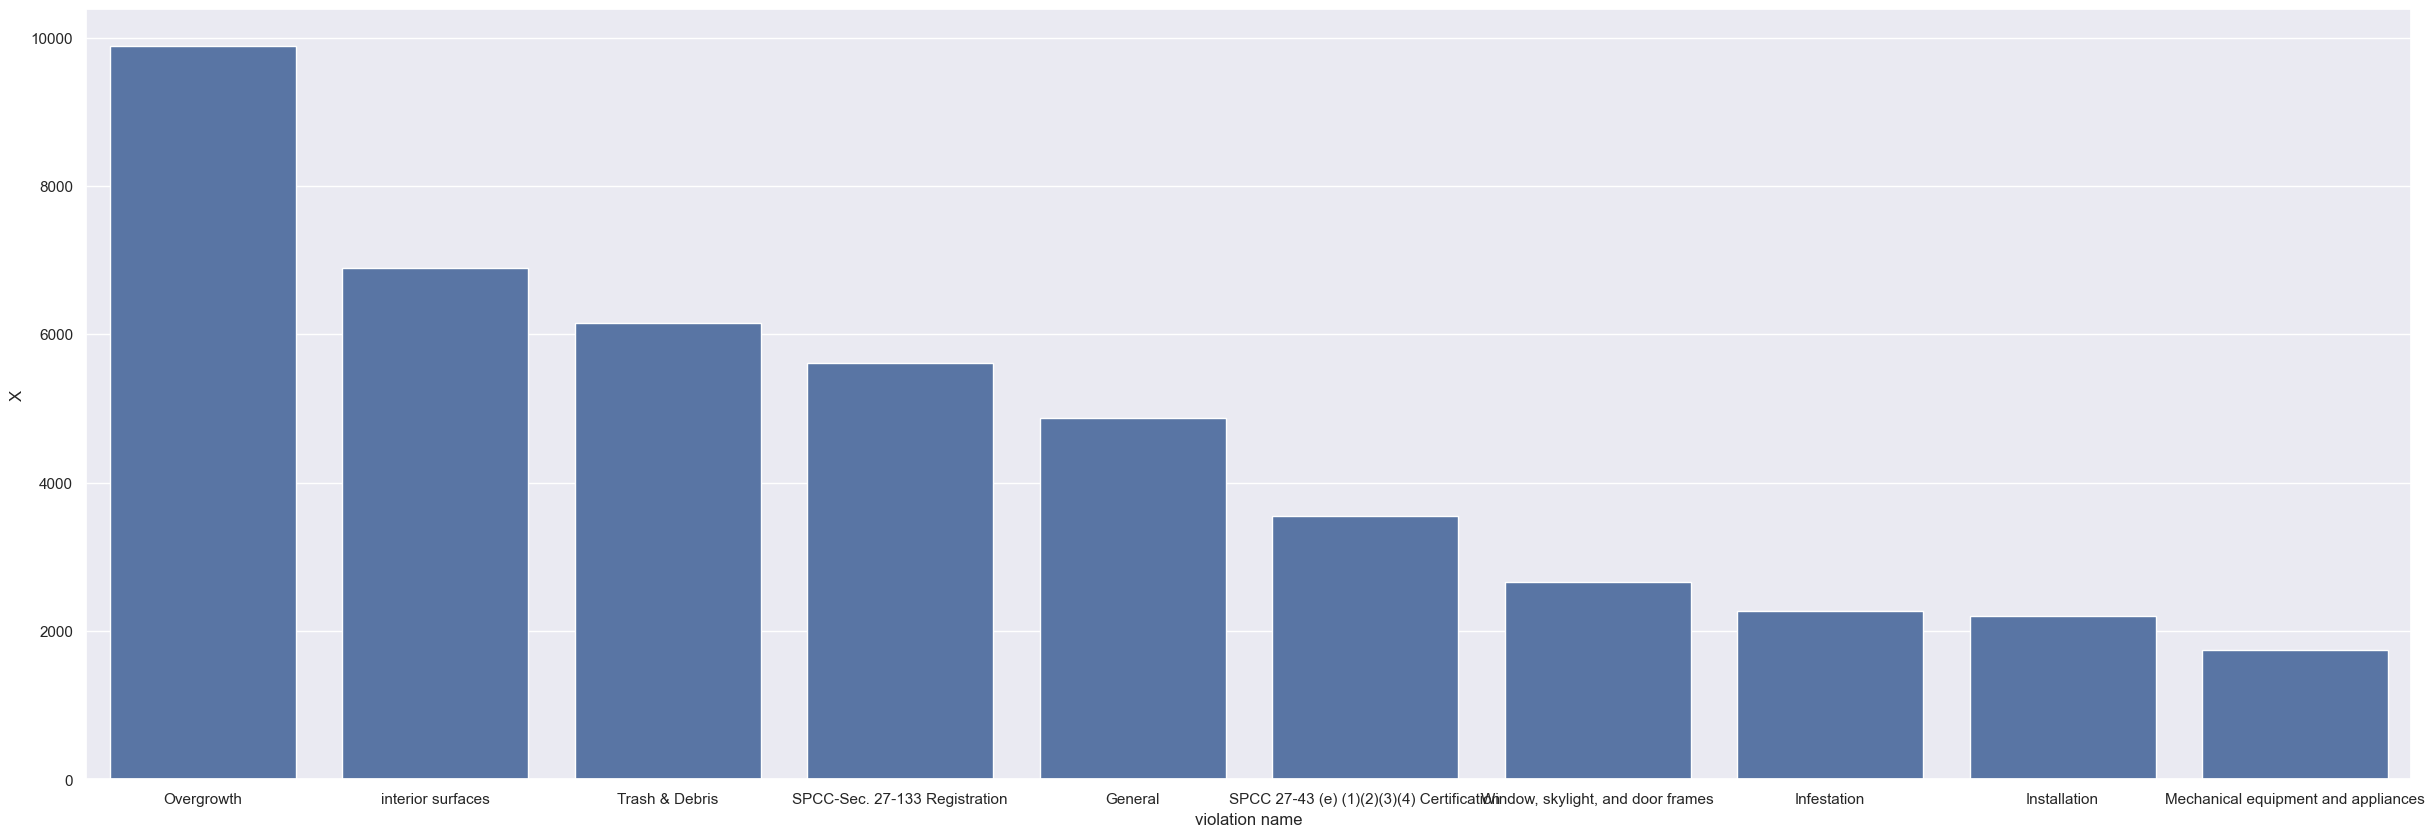

In [15]:
# 90% of the counts of violations are under 200 cases through about 5 years, what about the most frequent ones?
top10_frequent_violations=violation_counts[violation_counts['X']>200].head(10)
sns.set(rc={'figure.figsize':(30, 10)})
sns.barplot(x='violation name',y='X',data=top10_frequent_violations)
# we could generate a simple version of this 'violation' column, excluding information not so useful like 'SPCC - ' etc.

<font size=4># 3. What are the complaint types and how frequent is each type?</font> (Hang)

In [16]:
complaint_counts=code_violations.groupby('complaint_type_name')['X'].count().to_frame().sort_values(by=['X'],ascending=False)
complaint_counts=complaint_counts.reset_index()
complaint_counts.describe(percentiles=[.25,.75,.90])

,X
count,43.000000
mean,2288.395349
std,6358.091905
min,1.000000
25%,7.500000
50%,95.000000
75%,637.500000
90%,7745.400000
max,35927.000000


<Axes: xlabel='complaint_type_name', ylabel='X'>

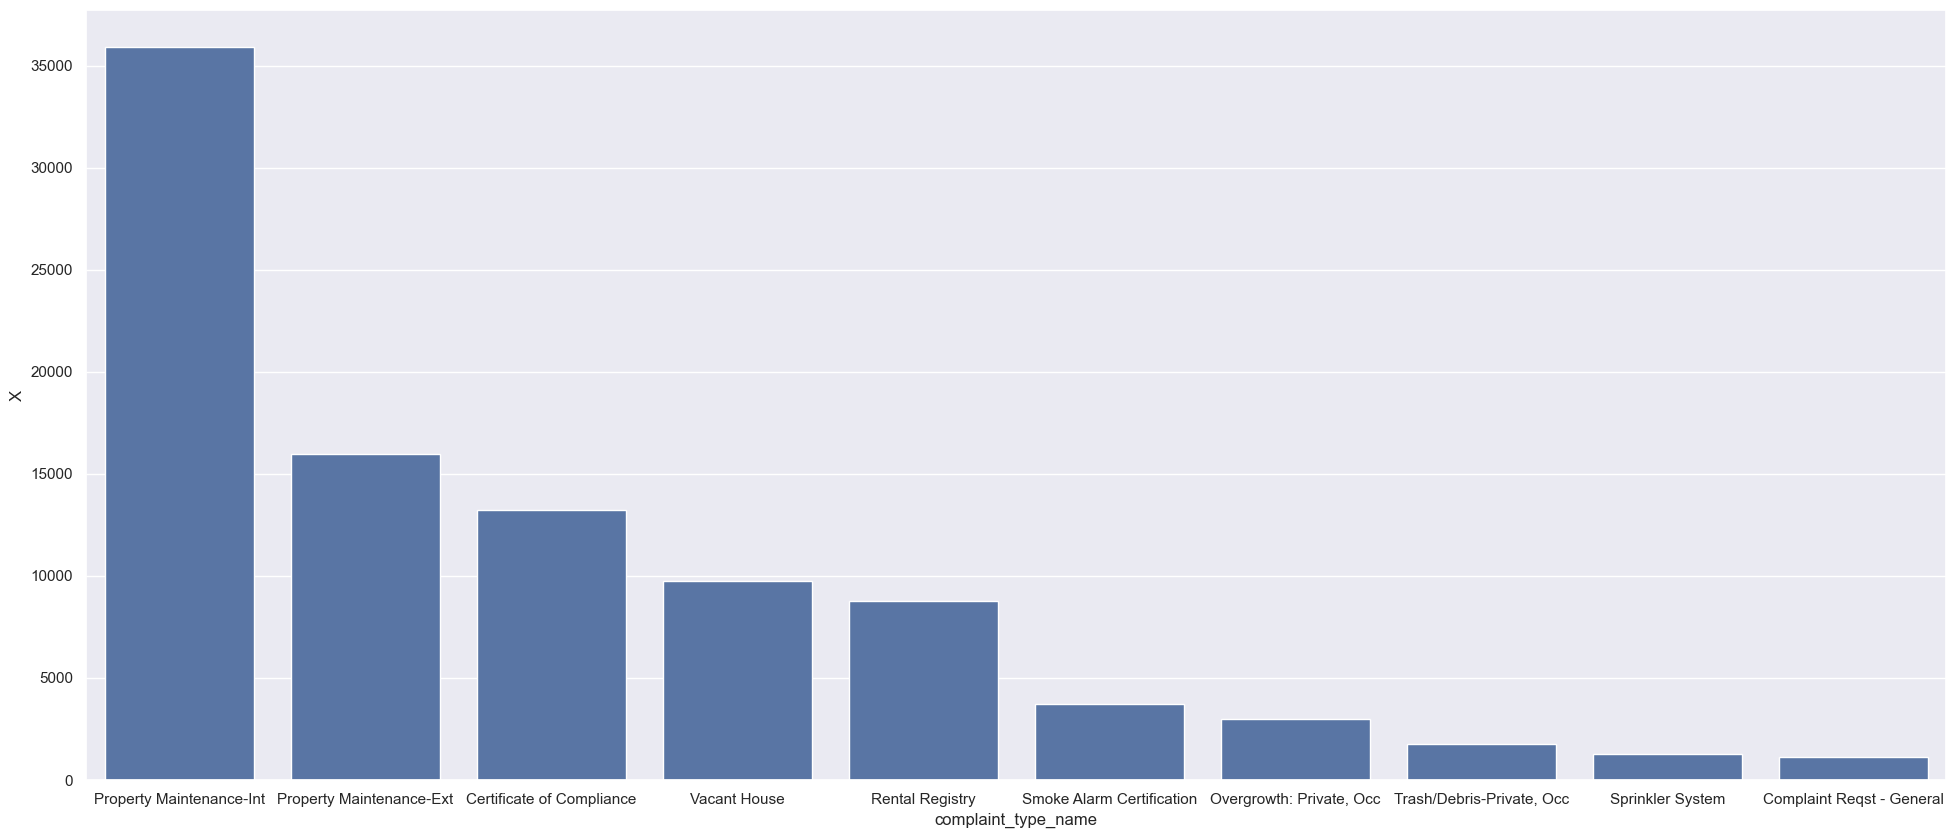

In [17]:
# what about the most frequent complaints?
top10_frequent_complaints=complaint_counts[complaint_counts['X']>200].head(10)
sns.set(rc={'figure.figsize':(24, 10)})
sns.barplot(x='complaint_type_name',y='X',data=top10_frequent_complaints)

<font size=6>Step 3. Answering addressed questions</font>

<font size=4>Question 1. Is there any correlation between neighborhood/location and type of violation?</font> (Hang)

<font size=4>1.1. Case numbers within each neighborhood</font>

In [18]:
# 1. Total case number within each neighborhood
total_case_neighborhood=code_violations.groupby('Neighborhood')['violation'].count().to_frame().sort_values('violation',ascending=False)
total_case_neighborhood.columns=['total_case_count']
# 2. Total violation type within each neighborhood
unique_violation_neighborhood=code_violations.groupby('Neighborhood')['violation'].nunique().to_frame().sort_values('violation',ascending=False)
unique_violation_neighborhood.columns=['unique_violation_count']
# 3. Total complaint type within each neighborhood
unique_complaint_neighborhood=code_violations.groupby('Neighborhood')['complaint_type_name'].nunique().to_frame().sort_values('complaint_type_name',ascending=False)
unique_complaint_neighborhood.columns=['unique_complaint_count']
compare_table=pd.concat([total_case_neighborhood,unique_violation_neighborhood,unique_complaint_neighborhood],axis=1)
compare_table

,total_case_count,unique_violation_count,unique_complaint_count
Neighborhood,,,
Northside,15467,406,30
Near Westside,7859,322,29
Brighton,7423,281,21
Washington Square,5503,305,26
Eastwood,5428,314,24
Park Ave,4535,263,19
Elmwood,4513,221,22
Southside,4368,236,20
Southwest,3818,241,21


<font size=4>1.2. The most frequent violation type for each neighborhoods</font>

In [19]:
violation_neighborhood=code_violations.groupby(['Neighborhood','violation name'])['violation'].count().to_frame()
violation_neighborhood.reset_index(inplace=True)
violation_neighborhood_top1=violation_neighborhood.iloc[violation_neighborhood.groupby('Neighborhood')['violation'].idxmax(),0:2].reset_index(drop=True)
violation_neighborhood_top1

,Neighborhood,violation name
0,Brighton,Overgrowth
1,Court-Woodlawn,Overgrowth
2,Downtown,Maintenance of required safeguards
3,Eastwood,Overgrowth
4,Elmwood,Overgrowth
5,Far Westside,SPCC-Sec. 27-133 Registration
6,Franklin Square,SPCC 27-43 (e) (1)(2)(3)(4) Certification
7,Hawley Green,interior surfaces
8,Hawley-Green,General
9,Lakefront,Maintained System


<font size=4>Methods used:</font>  
In this part of analysis, group-by functions and summary statistics are mainly used to answer frequency-related questions among neighborhoods.

<font size=4>Findings:</font>  
1. The violation case counts for the neighborhoods are different. "Northside" has the most total violation cases associated (15k), which is about 200% of the following neighborhood "near westside".
2. Fot the majority of neighborhoods, the most frequent violation type is "overgrowth", while for some neighborhoods, they have issues concerning "certification", "registration" and "interior surfaces". Not like others, that for downtown neighborhood is "Maintenance of required safeguards".

<font size=4>Question 2. Are the building owners generally local? Are any of them repeat offenders?</font> (Hang)

<font size=4>2.1. Violation counts of owners</font>

In [20]:
owner_zip=code_violations.groupby(['owner_name','owner_zip_code']).size().reset_index()
owner_zip.columns=['owner_name','owner_zip_code','violation_case_count']
owner_zip.sort_values('violation_case_count',inplace=True,ascending=False)
owner_zip['violation_case_count'].describe(percentiles=[.25,.75,.90,.99])

count    10272.000000
mean         9.511001
std         28.396806
min          1.000000
25%          1.000000
50%          3.000000
75%          9.000000
90%         21.000000
99%         93.290000
max       1597.000000
Name: violation_case_count, dtype: float64

In [21]:
# create a list of zip codes in Syracuse
Syracuse_zip_list=range(13201,13226)
remove_list=[13213,13216,13222,13223]
Syracuse_zip_list=np.delete(Syracuse_zip_list, [Syracuse_zip_list.index(x) for x in remove_list])
addition=np.array([13235,13244,13250,13251,13252,13261,13290])
Syracuse_zip_list=np.append(Syracuse_zip_list,addition)
Syracuse_zip_list=Syracuse_zip_list.astype(str)
Syracuse_zip_list

array(['13201', '13202', '13203', '13204', '13205', '13206', '13207',
       '13208', '13209', '13210', '13211', '13212', '13214', '13215',
       '13217', '13218', '13219', '13220', '13221', '13224', '13225',
       '13235', '13244', '13250', '13251', '13252', '13261', '13290'],
      dtype='<U21')

In [22]:
owner_top10_counts=owner_zip.head(10)
local_top10=owner_top10_counts.loc[owner_top10_counts['owner_zip_code'].isin(Syracuse_zip_list),:]
alien_top10=owner_top10_counts.loc[owner_top10_counts['owner_zip_code'].isin(Syracuse_zip_list)==0,:]
owner_top10_counts

,owner_name,owner_zip_code,violation_case_count
3571,GSPDC,13202,1597
10085,William D'Angelo,13088,616
7319,Otto Apartments LLC,60602,544
4214,Infisium Property Management,13120,515
1231,Ballantyne Garden Apt Syr LLC,11219,489
1232,Ballantyne Gardens Apts/Jackie,13205,489
4202,Infisium Properties,13206,444
9147,Syr Model Nbhrd Corp,13205,438
7274,Onondaga Hilltop Homes Inc,10022,394
4767,Jerry Murphy,13104,352


In [23]:
print([local_top10.shape[0],local_top10['violation_case_count'].sum()])
print([alien_top10.shape[0],alien_top10['violation_case_count'].sum()])

[4, 2968]
[6, 2910]


<font size=4>2.2. Local vs. alien owners</font>

In [24]:
local_owner=owner_zip.loc[owner_zip['owner_zip_code'].isin(Syracuse_zip_list),:]
[local_owner.shape[0],local_owner['violation_case_count'].sum()]

[7007, 51506]

In [25]:
alien_owner=owner_zip.loc[owner_zip['owner_zip_code'].isin(Syracuse_zip_list)==0,:]
[alien_owner.shape[0],alien_owner['violation_case_count'].sum()]

[3265, 46191]

<font size=4>Methods used:</font>  
In this part of analysis, data frame filtering using pandas and summary statistics with group-by function are mainly used.

<font size=4>Findings:</font>  
1. The majority (99%) of owners listed in the violation records are associated with less than about 93 records. Among the top 10 most frequent seen owners, most of them are companies while there are two owners that might be individuals.
2. Among the unique owners list, about 70% of them are local owners, which contribute about 50k violation records, while the left 30% of owners are aliens but contribute about 46k violation records. Based on the information, local owners are less likely to offend the regulations.

<font size=4>Question 3. How did COVID impact the number of housing violations (if at all)? </font> (Hang)

<font size=4>3.1. Covid outbreak</font>  
Timeline information source: https://www.cdc.gov/museum/timeline/covid19.html  
  
Based on the information provided by CDC (Centers for Disease Control and Prevention) in US, "After more than 118,000 cases in 114 countries and 4,291 deaths,the WHO declares COVID-19 a pandemic" on March 11, 2020  
  
Soon on March 13, 2020, "The Trump Administration declares a nationwide emergency and issues an additional travel ban on non-U.S. citizens traveling from 26 European countries due to COVID-19."

Based on these information and experience, let's assume the Covid affects U.S. mostly from 2020 to early 2022.

In [26]:
monthly_sum=code_violations.resample('M',on='violation_date')['violation'].count().to_frame().reset_index()
monthly_sum.head()

,violation_date,violation
0,2018-12-31,95
1,2019-01-31,668
2,2019-02-28,415
3,2019-03-31,781
4,2019-04-30,1070


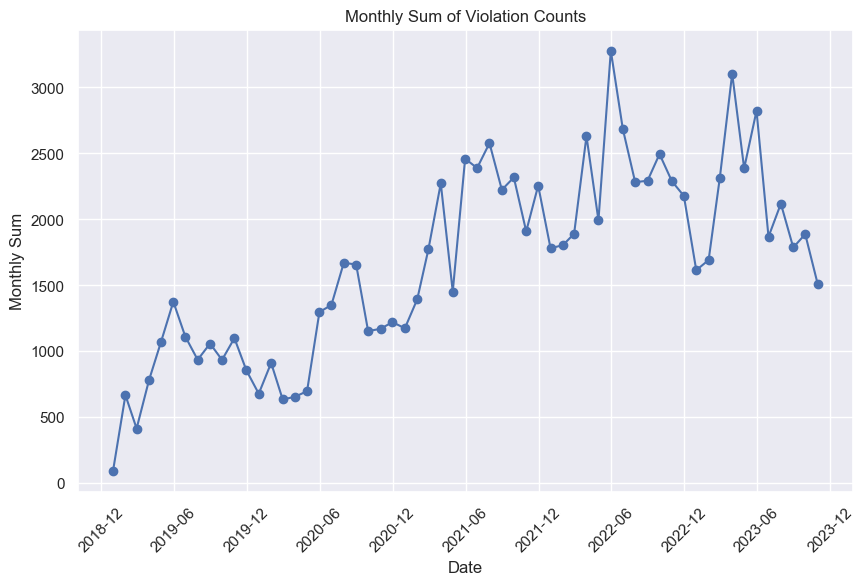

In [27]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(monthly_sum['violation_date'], monthly_sum['violation'], marker='o', linestyle='-', color='b')
plt.title('Monthly Sum of Violation Counts')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Monthly Sum')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.grid(True)
plt.show()

<font size=4>Methods used:</font>  
In this part of analysis, plotting with matplotlib is mainly used.

<font size=4>Findings:</font>  
Based on the plot, I cannot conclude there are influences on violation counts from Covid due to the lack of information before 2019.

<font size=4>Question 4. Have the types of violations given out changed over time? </font> (Andrea)

In [28]:
# there are 620 unique code violations, too many to track all of them
len(code_violations['violation name'].unique())
violation_counts = code_violations['violation name'].value_counts()

# Get the top 10 violations and filter data
top_5_violations = violation_counts.head(5).index
top_violations = code_violations[code_violations['violation name'].isin(top_5_violations)]

# there are 33427 instances, around one third of our data contained in the top 5 violations
len(top_violations)

33427

Now let's look at the presence of these top violations over time:

In [29]:
# grouping data by month
top_violations['month'] = top_violations['violation_date'].dt.to_period('M')
by_violation = top_violations.groupby(['violation name','month']).size().reset_index(name='count')

,violation name,month,count
0,General,2018-12,12
1,General,2019-01,29
2,General,2019-02,29
3,General,2019-03,46
4,General,2019-04,60
...,...,...,...
263,interior surfaces,2023-06,147
264,interior surfaces,2023-07,163
265,interior surfaces,2023-08,146
266,interior surfaces,2023-09,181


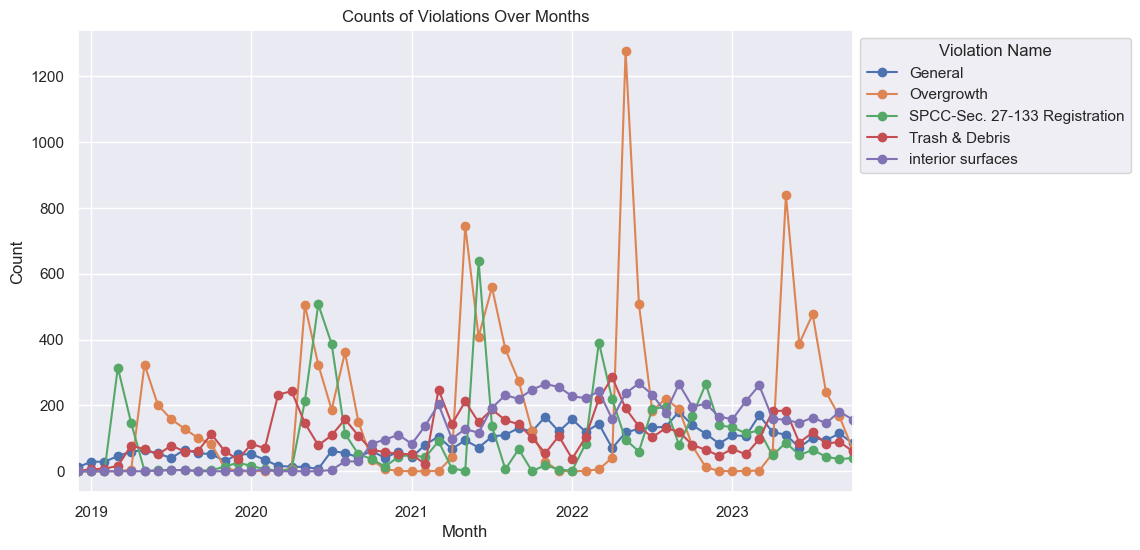

In [30]:
# pivot the table for better visualization
pivot_table = by_violation.pivot(index='month', columns='violation name', values='count').fillna(0)

# Plotting
pivot_table.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Counts of Violations Over Months')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Violation Name', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

Overgrowth, trash, and registration all seem to have some irregularities. Some background information on registration:

SPCC-Sec. 27-133 Registration
Source: https://library.municode.com/ny/syracuse/codes/code_of_ordinances?nodeId=REGEOR_CH27PRCOCOSY_ART9RERE_S27-133RE  

Owners need to complete an application form, disclose necessary information, pay fees, and comply with specific eligibility criteria, including having no open cases, being current on taxes, and passing inspections. The application form and compliance affidavit must be signed by the property owner or a registered property manager. Filing periods for applications depend on the property's location within the city's quadrants, and certificates are issued by specific deadlines. 

There is a specific location-dependent deadline for the registration application, which would explain the roughly annual spikes in the data. It also applies specifically to rental properties, which would explain its prevalance in a more urban town with a large college population like Syracuse. Now let's explore the other two violations, starting with overgrowth:

In [31]:
overgrowth = by_violation[by_violation['violation name']=='Overgrowth']
overgrowth['month'] = overgrowth['month'].dt.to_timestamp()
overgrowth['month'] = overgrowth['month'].dt.month
overgrowth.groupby('month').sum()

,count
month,
2,3
3,11
4,149
5,3689
6,1829
7,1563
8,1322
9,881
10,384


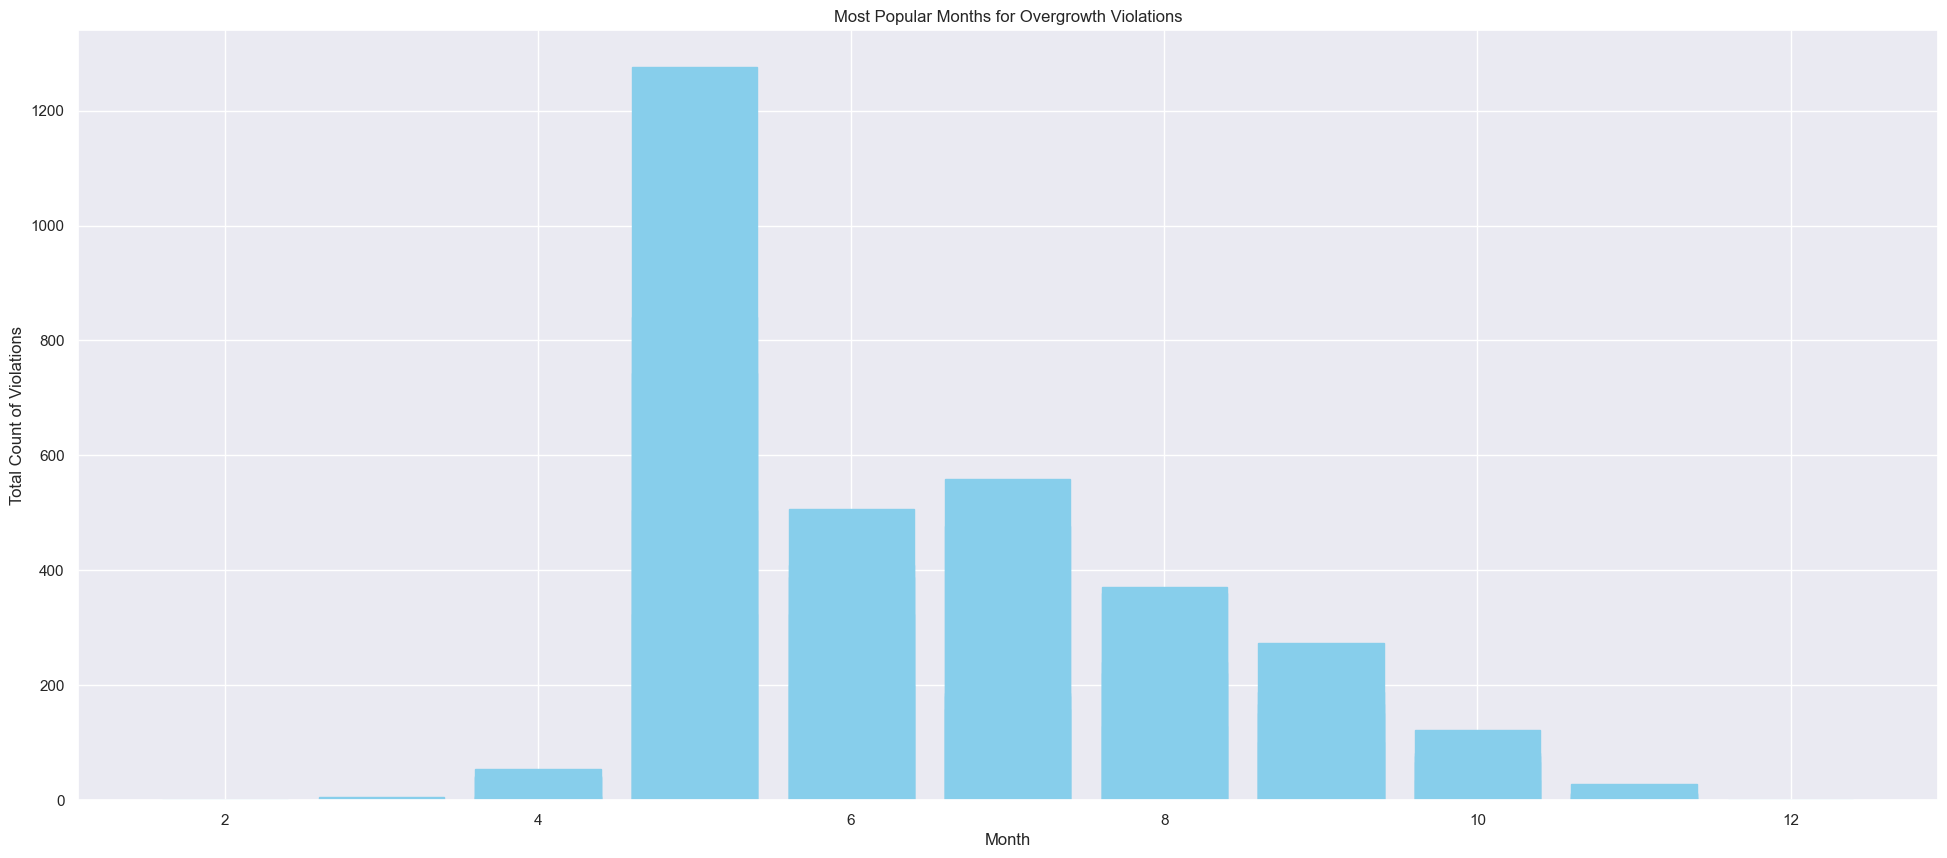

In [32]:
plt.bar(overgrowth['month'], overgrowth['count'], color='skyblue',edgecolor='skyblue')
plt.title('Most Popular Months for Overgrowth Violations')
plt.xlabel('Month')
plt.ylabel('Total Count of Violations')
plt.show()

So generally, these violations are occurring in the warmer months, which we would expect in a climate like Syracuse. Now, let's look into our other violation showing some irregularity, trash and debris:

In [33]:
trash = by_violation[by_violation['violation name']=='Trash & Debris'].sort_values(by='count', ascending=False)
trash.head(10)

,violation name,month,count
203,Trash & Debris,2022-04,285
190,Trash & Debris,2021-03,248
179,Trash & Debris,2020-04,243
178,Trash & Debris,2020-03,233
202,Trash & Debris,2022-03,220
192,Trash & Debris,2021-05,212
204,Trash & Debris,2022-05,191
194,Trash & Debris,2021-07,188
216,Trash & Debris,2023-05,184
215,Trash & Debris,2023-04,183


It looks like there was a spike right around the beginning of COVID, but the top months are all in the spring or summer. Let's see if this is indicative of a larger pattern:

In [34]:
trash['month'] = trash['month'].dt.to_timestamp()
trash['month'] = trash['month'].dt.month
trash.groupby('month').sum()

,count
month,
1,247
2,253
3,814
4,932
5,800
6,502
7,596
8,588
9,522


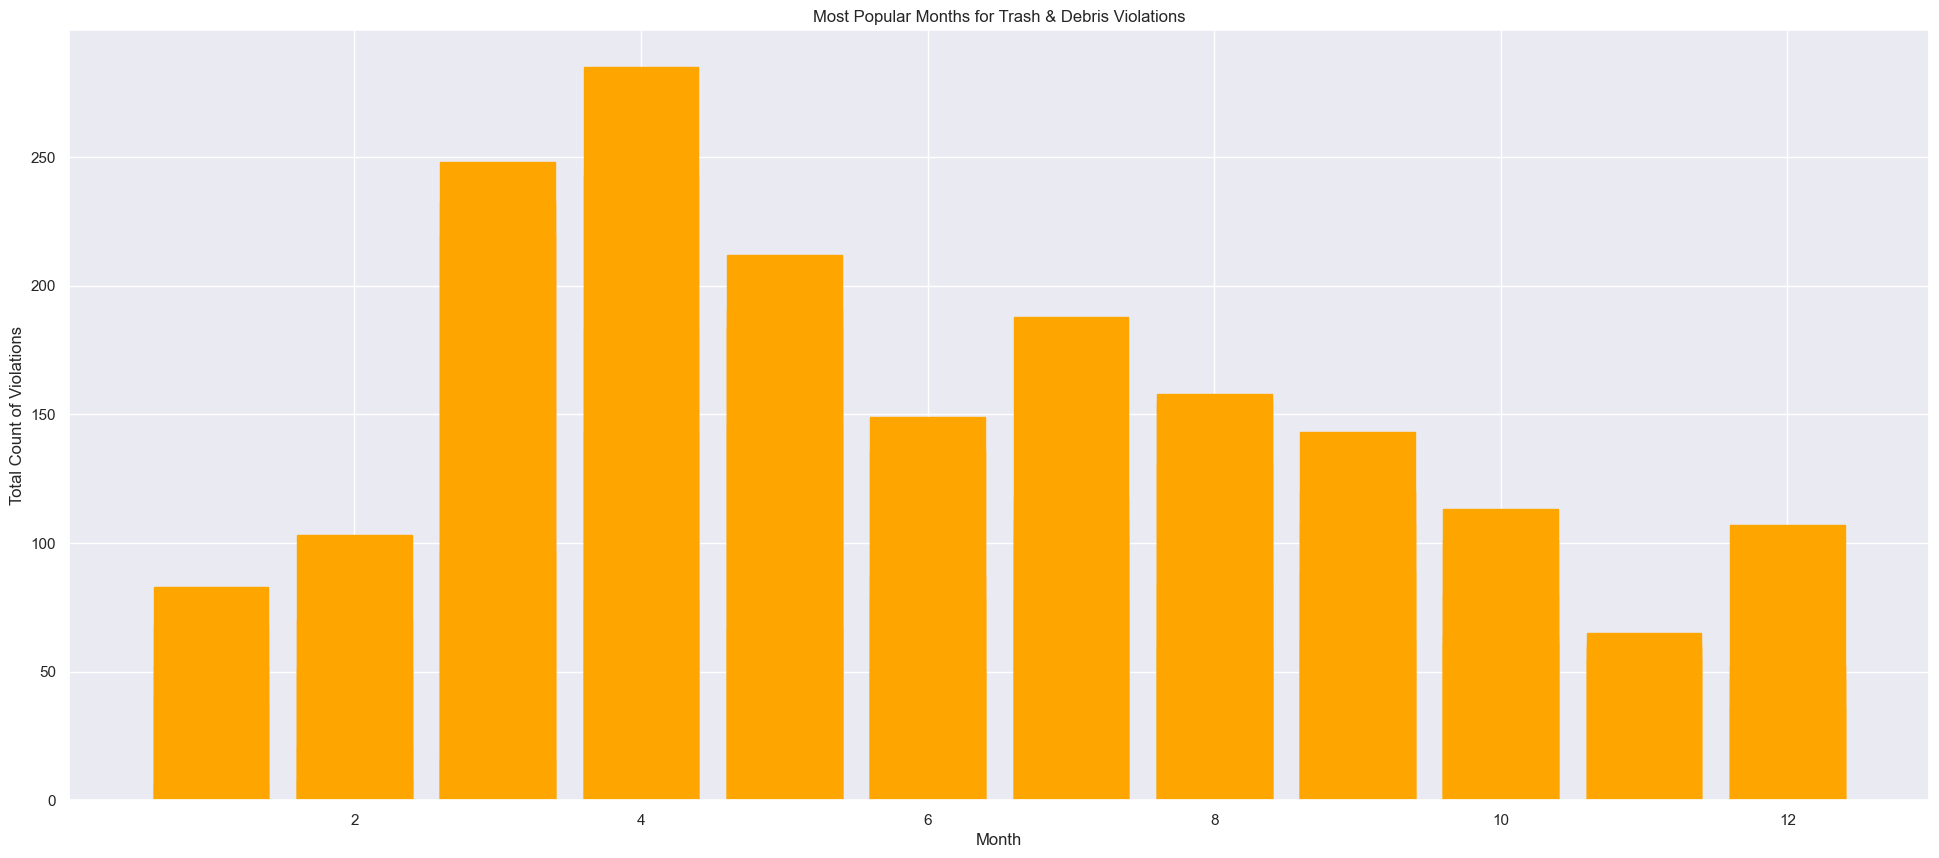

In [55]:
plt.bar(trash['month'], trash['count'], color='orange',edgecolor='orange')
plt.title('Most Popular Months for Trash & Debris Violations')
plt.xlabel('Month')
plt.ylabel('Total Count of Violations')
plt.show()

Although there does seem to be some relation between trash violations and month, it is not as obvious as overgrowth.

<font size=4>Question 5. Is there a relationship between demographic and types/amounts of violations? </font> (Andrea)

First, let's look at the relationship between demographics and amounts of violations:

In [56]:
# get violation counts for each zip
by_zip = code_violations.groupby('complaint_zip').size().reset_index(name='count')

# merge the grouped data with the demographics
by_zip_all = pd.merge(by_zip, zip_data, left_on='complaint_zip', right_on='zipcode', how='left')

# converting all columns to numeric
by_zip_all = by_zip_all.apply(pd.to_numeric)
by_zip_all.sort_values(by="count", ascending=False)

,complaint_zip,count,Total Population,Median Household Income,White Population,zipcode
2,13204,22004,18741,34856,923,13204
3,13205,20474,17212,32579,1161,13205
6,13208,17235,22833,38475,1163,13208
1,13203,15308,16513,38018,1044,13203
7,13210,7927,27916,31319,840,13210
4,13206,5434,16723,43674,1207,13206
5,13207,4550,12597,53012,807,13207
0,13202,2742,6787,20196,159,13202
11,13224,2595,8369,62485,661,13224
8,13214,125,8439,74098,520,13214


Now let's examine the relationship between number of violations and each demographic variable:

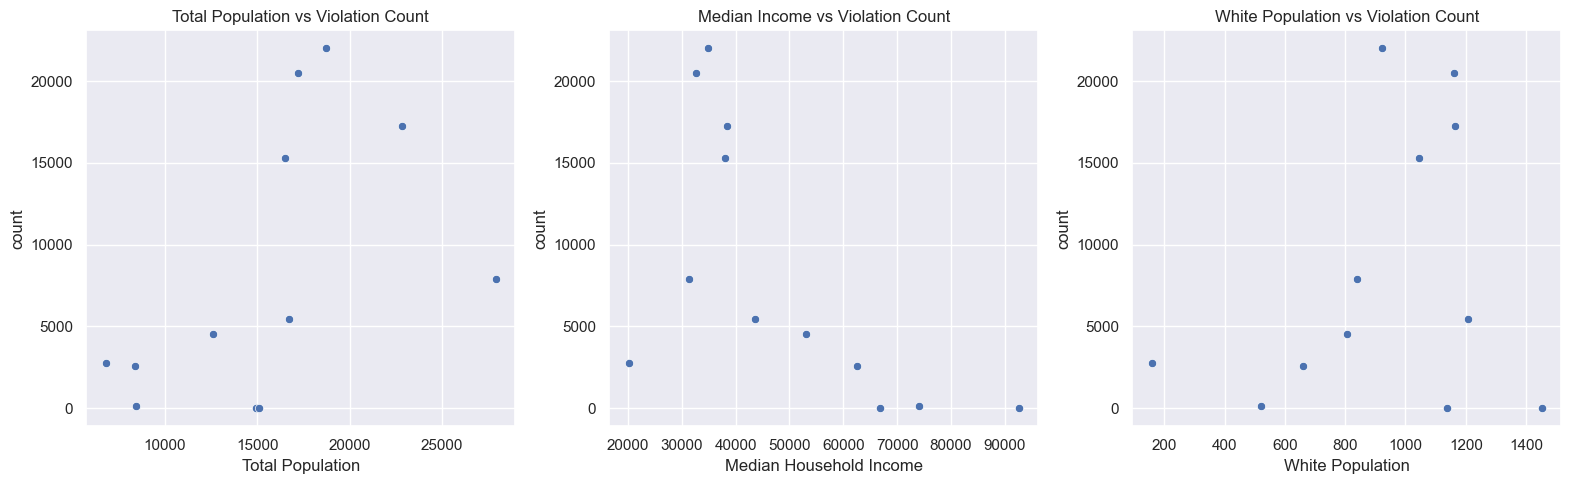

In [50]:
# Scatter plots for individual relationships
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=by_zip_all, x='Total Population', y='count')
plt.title('Total Population vs Violation Count')

plt.subplot(1, 3, 2)
sns.scatterplot(data=by_zip_all, x='Median Household Income', y='count')
plt.title('Median Income vs Violation Count')

plt.subplot(1, 3, 3)
sns.scatterplot(data=by_zip_all, x='White Population', y='count')
plt.title('White Population vs Violation Count')

plt.tight_layout()
plt.show()

Looking further, we can obtain the correlation between all variables:

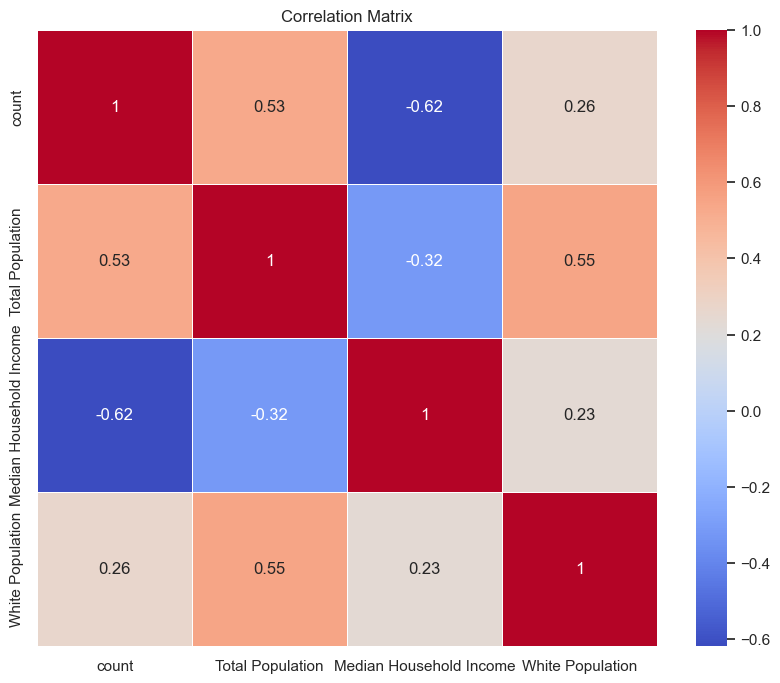

In [ ]:
correlation_matrix = by_zip_all[['count', 'Total Population', \
                                 'Median Household Income', 'White Population']].corr()

# heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

Most notably, there is a decent negative correlation between median income and code violations. Otherwise, our demographic variables prove to have week realtionships to the amount of code violations. Now, let's look at the most common violation type for each zipcode.

In [54]:
by_zip_type_income = code_violations.groupby(['complaint_zip', \
    'Median Household Income', 'violation name']).size().reset_index(name='count')

# Find the most common violation for each combination of 'zipcode' and 'median_income'
most_common_violations = by_zip_type_income.sort_values('count', \
    ascending=False).drop_duplicates(['complaint_zip', 'Median Household Income'])
most_common_violations

,complaint_zip,Median Household Income,violation name,count
1211,13205,32579,Overgrowth,2610
856,13204,34856,Overgrowth,2037
1999,13208,38475,Overgrowth,1457
464,13203,38018,Overgrowth,1248
2371,13210,31319,SPCC-Sec. 27-133 Registration,778
1496,13206,43674,Overgrowth,715
1709,13207,53012,Overgrowth,710
2648,13224,62485,Overgrowth,260
128,13202,20196,Maintenance of required safeguards,181
2485,13214,74098,Overgrowth,19


Overwhelmingly, the top violation among all zipcodes is overgrowth. However, maintenance of required safeguards is a standout -- it was not in our top violations overall, and it is only the top violation for 13202. Here are the specifics of the violation:

Source: https://up.codes/s/maintenance-of-required-safeguards

"Where any device, equipment, system, condition, arrangement, level of protection, or any other feature is required for compliance with the provisions of the Fire Code, or otherwise installed, such device, equipment, system, condition, arrangement, level of protection, or other feature shall thereafter be continuously maintained in accordance with the 2015 IFC, the 2015 IPMC, and applicable referenced standards."

This also happens to be the zipcode with the smallest median household income by far, indicating that there is a potential that the popularity of this violation may be related to the affordability (or lack thereof) of maintiaining their systems in accordance with the Fire Code. 

Additionally, Syracuse University is located within 13210, so it is interesting that it is one of the two zipcodes with registration issues. As discussed earlier, the violation specfically deals with rental properties, so it actually makes a lot of sense that the zipcode mostly containing college students has a rental-related violation as its most popular.



<font size=6>Step 4. Conclusions and Discussion</font>

<font size = 4>Here are the key takeaways from our analysis:</font>  
  
* Total violation records among neighborhoods are different, but most frequent seen violation types are similar​  

* "Owners" associated with the highest count of violation records are mostly companies. Local owners have lower per capita violation counts compared with non-local owners​

* Constraint by the date range of this dataset, the influence of Covid-19 on code violations is hard to tell​

* Changes in violations over time are primarily influenced by time of year​

* There appears to be some connection between income and type/amount of violations